In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.axisartist.angle_helper as angle_helper

from matplotlib.transforms import Affine2D
from matplotlib.projections import PolarAxes
from mpl_toolkits.axisartist import HostAxes
from mpl_toolkits.axisartist import GridHelperCurveLinear

In [2]:
def curvelinear_test2(fig):
    """Polar projection, but in a rectangular box."""
    # see demo_curvelinear_grid.py for details
    tr = Affine2D().scale(np.pi / 180.0, 1.0) + PolarAxes.PolarTransform()

    extreme_finder = angle_helper.ExtremeFinderCycle(
        20, 20, lon_cycle=360, lat_cycle=None,
        lon_minmax=None, lat_minmax=(0, np.inf),
    )

    grid_locator1 = angle_helper.LocatorDMS(12)

    tick_formatter1 = angle_helper.FormatterDMS()

    grid_helper = GridHelperCurveLinear(
        tr, extreme_finder=extreme_finder,
        grid_locator1=grid_locator1,
        tick_formatter1=tick_formatter1,
    )

    ax1 = fig.add_subplot(axes_class=HostAxes, grid_helper=grid_helper)

    # Now creates floating axis

    # floating axis whose first coordinate (theta) is fixed at 60
    ax1.axis["lat"] = axis = ax1.new_floating_axis(0, 60)
    axis.label.set_text(r"$\theta = 60^{\circ}$")
    axis.label.set_visible(True)

    # floating axis whose second coordinate (r) is fixed at 6
    ax1.axis["lon"] = axis = ax1.new_floating_axis(1, 6)
    axis.label.set_text(r"$r = 6$")

    ax1.set_aspect(1.)
    ax1.set_xlim(-5, 12)
    ax1.set_ylim(-5, 10)

    ax1.grid(True)

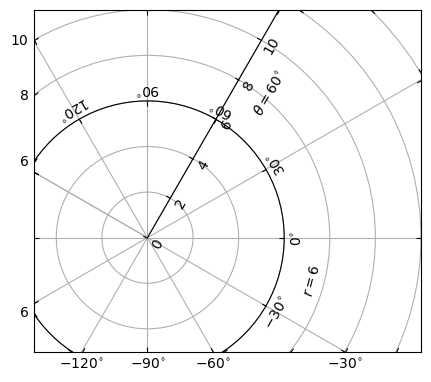

In [3]:
fig = plt.figure(figsize=(5, 5))
curvelinear_test2(fig)
plt.show()